In [91]:
import matplotlib.pyplot as plt
from matplotlib import ticker, colors, colormaps
import pandas as pd
from matplotlib.figure import figaspect
import seaborn as sns
import numpy as np
import string
import re

In [92]:
xlxs = pd.ExcelFile("4 Punkt Biegeversuch-Stab_4.xlsx")
xlxs.sheet_names

['Parameter',
 'Ergebnisse',
 'Statistik',
 'F1',
 'F2',
 'F3',
 'F4',
 'E1',
 'E2',
 'E3',
 'E4',
 'X1',
 'X2',
 'X3',
 'X4',
 'B1',
 'B2',
 'B3',
 'B4',
 'B5',
 'B6',
 'B7',
 'B8',
 'B9',
 'B10',
 'D1',
 'D2',
 'D3',
 'D4',
 'D5',
 'D6',
 'D7',
 'D8',
 'D9',
 'D10',
 'D11',
 'C1',
 'C2',
 'C3',
 'C4',
 'C5',
 'C6',
 'C7',
 'C8',
 'C9',
 'C10',
 'C11',
 'G1',
 'H1',
 'I1',
 'J1',
 'K1']

In [93]:
df = pd.read_excel(xlxs, "B7")

df

,B7,B7.1,B7.2,B7.3,B7.4,B7.5,B7.6,B7.7
0,Prüfzeit,Standardkraft,Standardweg,Verformung,Traversenweg absolut,Traversenweg,Feindehnung,Zeit
1,s,N,mm,mm,mm,mm,mm,s
2,0,4.969933,0,0,-586.473947,0,0,2.364075
3,0.1,4.9179,0,0,-586.473947,0,0,2.464075
4,0.2,5.010574,-0.000016,-0.000016,-586.473963,-0.000016,0,2.564075
...,...,...,...,...,...,...,...,...
669,63.86,67.601135,4.417333,4.417333,-582.056613,4.417333,0,66.224075
670,63.96,67.779785,4.422557,4.422557,-582.051389,4.422557,0,66.324075
671,64.06,67.842987,4.428024,4.428024,-582.045923,4.428024,0,66.424075
672,64.16,67.914162,4.43346,4.43346,-582.040487,4.43346,0,66.524075


In [94]:
data = {}

translate = {"Prüfzeit" : "Test_time",
             "Standardkraft" : "Force",
             "Verformung": "Deformation"}
row_skip = [2,3]

for name in xlxs.sheet_names:
    if not re.match("^[A-Z]\\d+$", name): continue

    sample = pd.read_excel(xlxs, sheet_name=name, header=1, usecols=translate.keys(), skiprows=row_skip)

    sample = sample.rename(translate, axis=1)

    data[name] = sample

print(len(data), "\n")

data

49 



{'F1':       Test_time        Force  Deformation
 0          0.10     4.994614    -0.000032
 1          0.20     4.939744    -0.000033
 2          0.30     4.954728    -0.000033
 3          0.40     5.292809     0.000422
 4          0.42     5.544762     0.010829
 ...         ...          ...          ...
 1126      22.19  1744.005859     5.799249
 1127      22.21  1745.587891     5.800178
 1128      22.23  1747.294922     5.801105
 1129      22.25  1748.970703     5.802032
 1130      22.26  1729.345703     5.802505
 
 [1131 rows x 3 columns],
 'F2':       Test_time        Force  Deformation
 0          0.10     5.077642    -0.000033
 1          0.20     5.082481    -0.000033
 2          0.30     5.014474    -0.000033
 3          0.39     5.732065     0.015584
 4          0.40     5.999643     0.029500
 ...         ...          ...          ...
 2082      41.11  3258.463867     7.455417
 2083      41.13  3260.249023     7.456622
 2084      41.15  3262.014648     7.457828
 2085      41.

In [95]:
test = data["F3"]

test

,Test_time,Force,Deformation
0,0.10,4.961107,-0.000016
1,0.20,5.063761,-0.000033
2,0.30,5.010851,-0.000033
3,0.40,5.723223,0.017090
4,0.41,6.033770,0.032715
...,...,...,...
1762,34.60,2738.448242,6.426578
1763,34.62,2739.909180,6.427505
1764,34.64,2741.541992,6.428433
1765,34.66,2743.155273,6.429393


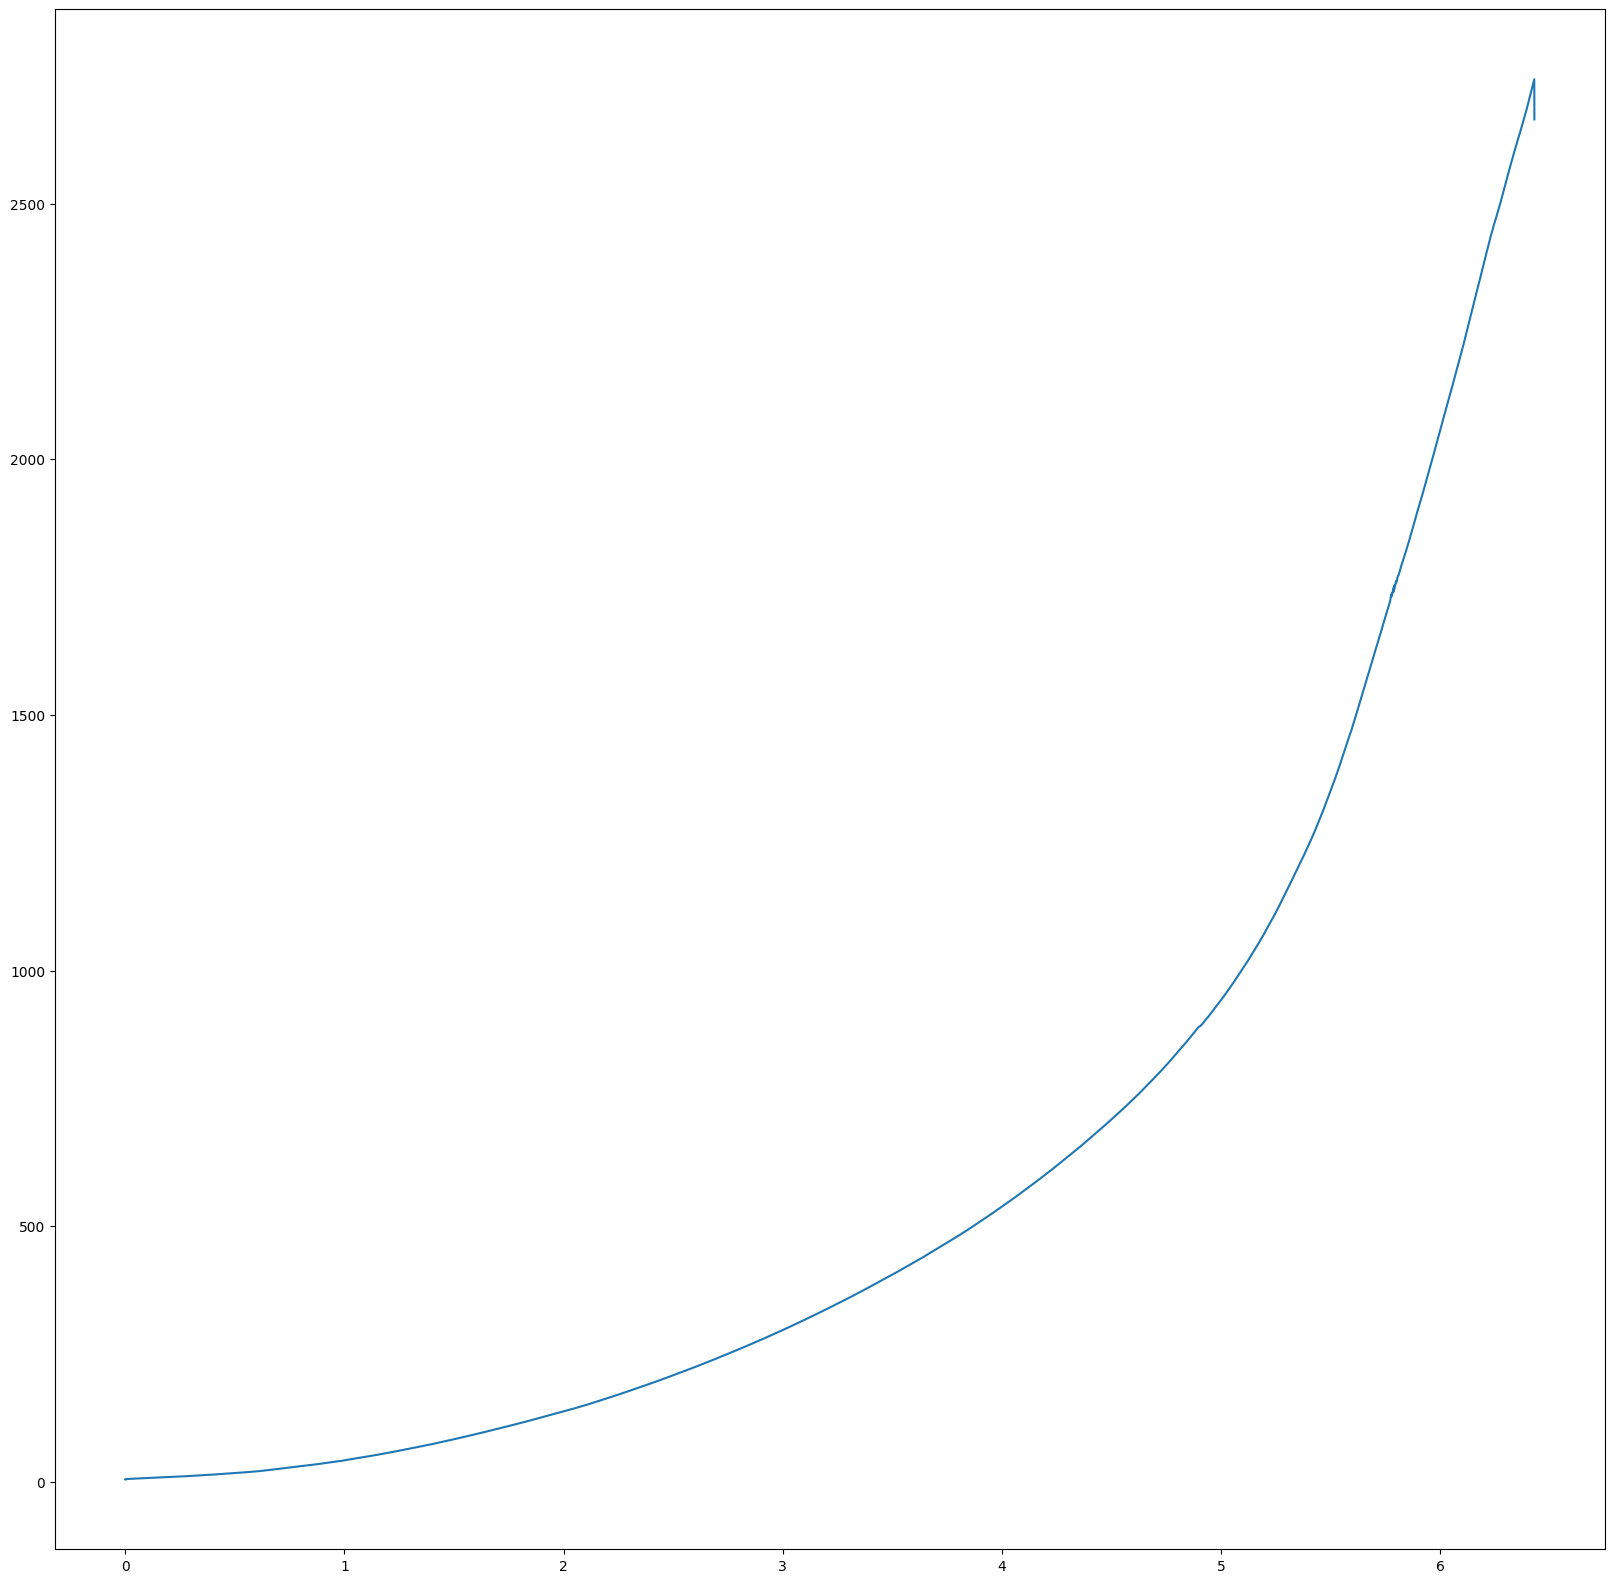

In [96]:
plt.figure(figsize=(20,20))

plt.plot("Deformation", "Force", data=test)

In [ ]:
class FitStiffData:
    def __init__(self, filename):
        pass